In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e1/sample_submission.csv
/kaggle/input/playground-series-s3e1/train.csv
/kaggle/input/playground-series-s3e1/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e1/train.csv')
train.head(5)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
test = pd.read_csv('/kaggle/input/playground-series-s3e1/test.csv')
test.head(5)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [5]:
train_dtypes = train.dtypes
train_null = train.isna().sum()
train_nuinq = train.nunique()

train_info = pd.DataFrame([train_dtypes, train_null, train_nuinq], index = ['dtype', 'nnull', 'nuinq'], columns = train.columns)
train_info

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nnull,0,0,0,0,0,0,0,0,0,0
nuinq,37137,12310,51,22069,14066,3694,21078,791,755,3723


In [6]:
train.drop(columns = ['id']).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [7]:
test_dtypes = train.dtypes
test_null = train.isna().sum()
test_nuinq = train.nunique()

test_info = pd.DataFrame([test_dtypes, test_null, test_nuinq], index = ['dtype', 'nnull', 'nuinq'], columns = test.columns)
test_info

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64
nnull,0,0,0,0,0,0,0,0,0
nuinq,37137,12310,51,22069,14066,3694,21078,791,755


In [8]:
test.drop(columns = ['id']).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,3.832618,26.041561,5.168789,1.063599,1679.327548,2.830808,35.598007,-119.570208
std,1.797503,12.177907,1.252874,0.123630,1365.598976,1.615320,2.097787,1.977200
min,0.499900,2.000000,1.000000,0.560000,3.000000,0.764706,32.550000,-124.230000
25%,2.590150,17.000000,4.356443,1.020460,955.000000,2.400000,33.930000,-121.800000
50%,3.504600,25.000000,5.077143,1.054094,1398.000000,2.751592,34.200000,-118.460000
75%,4.687500,35.000000,5.858646,1.088295,1874.000000,3.129167,37.720000,-118.020000
max,15.000100,52.000000,56.269231,10.500000,35682.000000,230.172414,41.950000,-114.550000


<Axes: >

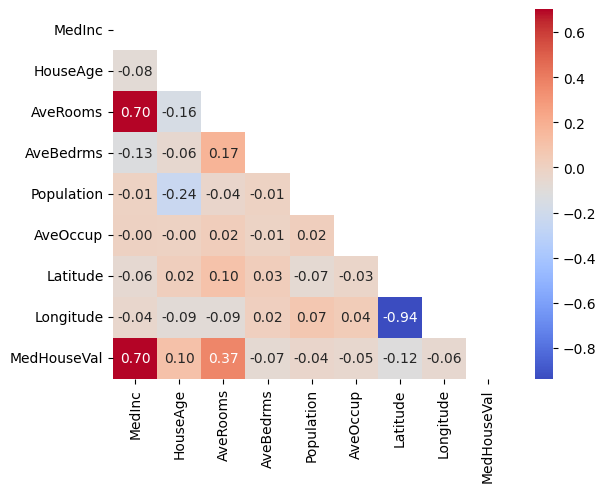

In [9]:
train_copy = train.drop(columns = ['id'])
mask = np.zeros_like(train_copy.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_copy.corr(), cmap = 'coolwarm', annot = True, mask = mask, fmt = '.2f')

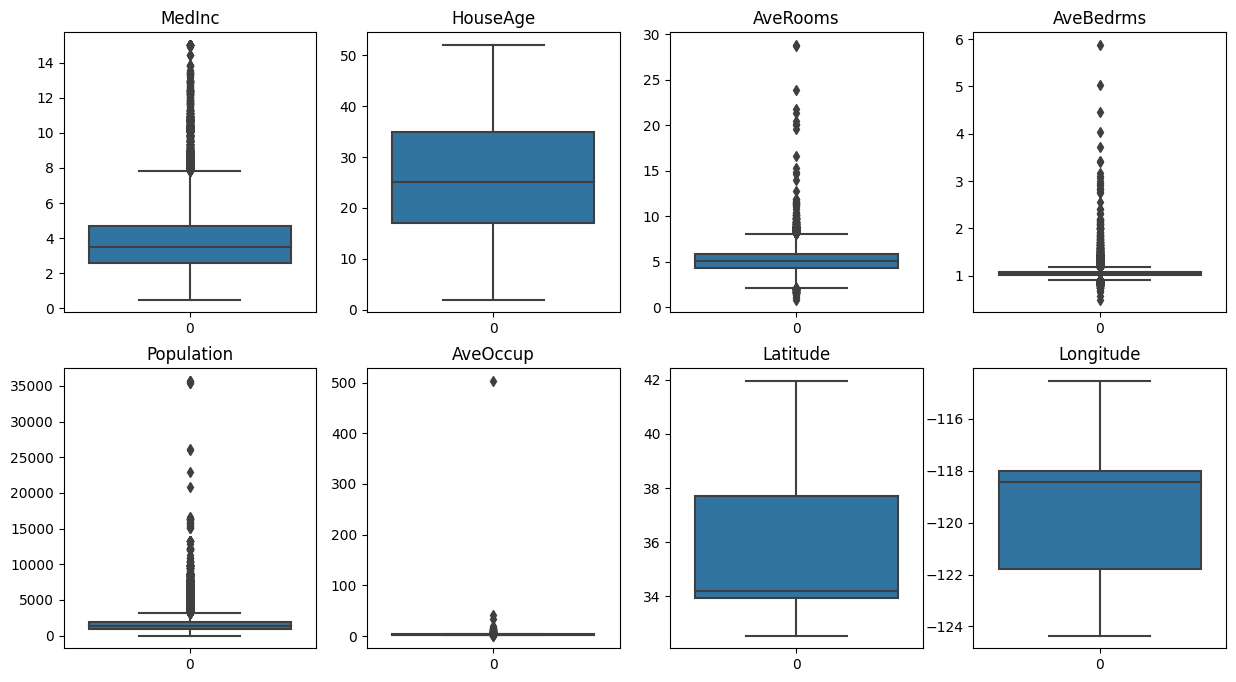

In [10]:
fig, axes  = plt.subplots(2,4,figsize = (15,8))

for i, ax in enumerate(axes.flatten()):
    col = train_copy.columns[i]
    sns.boxplot(data = train_copy[col], ax = ax)
    ax.set_title(col)

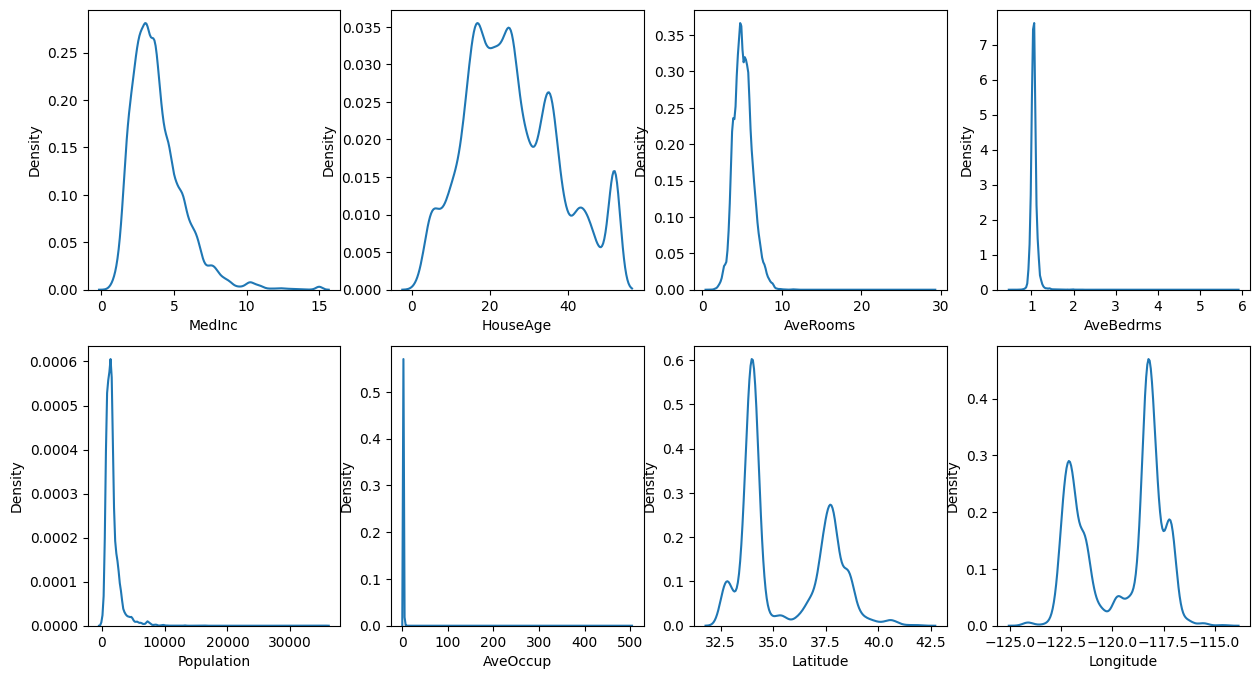

In [11]:
fig, axes  = plt.subplots(2,4,figsize = (15,8))

for i, ax in enumerate(axes.flatten()):
    col = train_copy.columns[i]
    sns.kdeplot(data = train_copy[col], ax = ax)

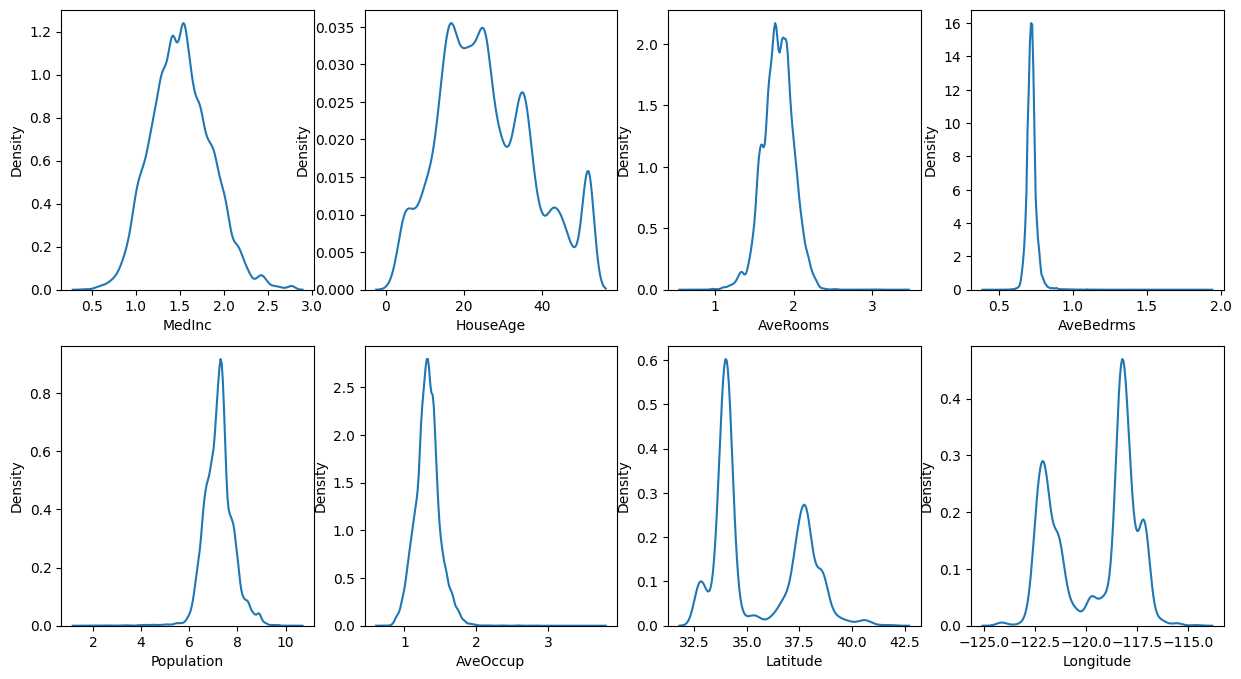

In [12]:
train_log = train_copy[~(train_copy['AveOccup'] > 500)]
y_train = train_log['MedHouseVal']
train_log = train_log.drop(columns = ['MedHouseVal'])


for col in ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    train_log[col] = train_log[col].map(np.log1p)

fig, axes  = plt.subplots(2,4,figsize = (15,8))

for i, ax in enumerate(axes.flatten()):
    col = train_log.columns[i]
    sns.kdeplot(data = train_log[col], ax = ax)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
Scaler = StandardScaler()
train_scaled = Scaler.fit_transform(train_log)
pca = PCA()
pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)

In [15]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns = ['EVR'], index = [f'PC{i}' for i in range(1,9)])

,EVR
PC1,0.253368
PC2,0.470726
PC3,0.624685
PC4,0.762095
PC5,0.877881
PC6,0.963055
PC7,0.994468
PC8,1.000000


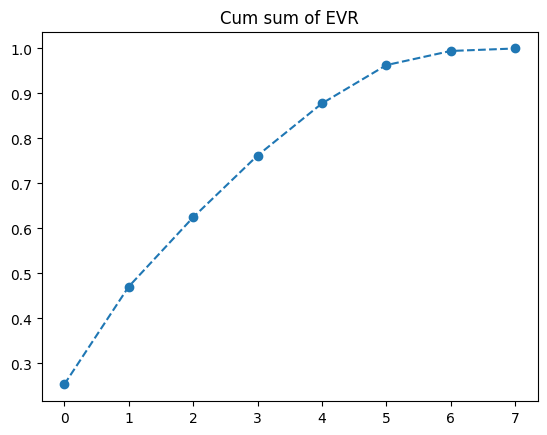

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o--')
plt.title('Cum sum of EVR')
plt.show()

In [17]:
pca = PCA(n_components = 6)
pca.fit(train_scaled)
x_train = pca.transform(train_scaled)
x_train

array([[-0.42027598,  1.17062242, -0.62465959,  0.89643906, -0.41017082,
         0.63326256],
       [ 1.39373057, -0.68609942, -1.2593605 , -0.65897091,  1.06437019,
         0.70138105],
       [ 0.50890133, -1.05014483,  0.66997301,  0.7436586 ,  0.11160417,
        -0.2308781 ],
       ...,
       [ 2.28304527,  1.2267401 ,  1.60892929,  0.77114188, -1.07346136,
        -1.91688385],
       [ 1.58652613,  0.18624346, -0.01773952,  0.41266097,  0.37539919,
         1.58870105],
       [ 0.03345719,  0.52615109, -0.22559333, -0.80953919,  1.48514388,
         0.11810107]])

In [18]:
from lightgbm import LGBMRegressor

In [19]:
model = LGBMRegressor()

In [20]:
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 37136, number of used features: 6
[LightGBM] [Info] Start training from score 2.079687


LGBMRegressor()

In [21]:
test_log = test.drop(columns  = ['id'])

for col in ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    test_log[col] = test_log[col].map(np.log1p)

test_scaled = Scaler.transform(test_log)
x_test = pca.transform(test_scaled)
x_test

array([[ 1.95331509e+00,  1.67373517e+00, -5.47264493e-01,
        -7.28058564e-02,  8.55785036e-01, -1.32472870e-01],
       [-1.59535691e+00,  1.41238948e+00, -1.16827263e+00,
         1.84053422e-01,  5.03289310e-01,  9.68679932e-02],
       [-7.90053575e-01, -2.72177406e+00,  5.94221644e-01,
        -7.99307137e-01, -6.26858744e-01, -1.07259504e-03],
       ...,
       [ 5.95254413e-01,  5.88908960e-01, -2.25919203e+00,
         1.12115531e+00, -1.17790746e-01, -6.83509391e-01],
       [-6.51393280e-01, -2.92265682e+00,  9.96737873e-02,
         3.67417759e-01, -7.95627181e-01,  5.54254247e-01],
       [ 3.38628761e+00, -2.61250232e-01,  5.21170444e+00,
         3.13251771e-01,  6.89781108e-01,  4.42677577e+00]])

In [22]:
y_test = model.predict(x_test)
y_test

array([0.84282064, 1.35596005, 3.83209106, ..., 1.33353261, 3.88800274,
       3.36744422])

In [23]:
y = pd.read_csv('/kaggle/input/playground-series-s3e1/sample_submission.csv')
y['MedHouseVal'] = y_test
y.to_csv('submission.csv', index = False)